Before we jump into the project with a full dataset, let's just take a look at how the PyTorch LSTM layer really works in practice by visualizing the outputs.

https://pytorch.org/docs/stable/nn.html#lstm

In [1]:
import torch
import torch.nn as nn

Just like the other kinds of layers, we can instantiate an LSTM layer and provide it with the necessary arguments. The full documentation of the accepted arguments can be found here. In this example, we will only be defining the input dimension, hidden dimension, and the number of layers.

- Input dimension - represents the size of the input at each time step
    - e.g. input of dimension 5 will look like this [1, 3, 8, 2, 3]
    
    
- Hidden dimension - represents the size of the hidden state and cell state at each time step
    - e.g. the hidden state and cell state will both have the shape of [3, 5, 4] if the hidden dimension is 3
    
    
- Number of layers - the number of LSTM layers stacked on top of each other

In [2]:
input_dim = 5
hidden_dim = 10
n_layers = 1

lstm_layer = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

Let's create some dummy data to see how the layer takes in the input. As our input dimension is 5, we have to create a tensor of the shape (1, 1, 5) which represents (*batch size, sequence length, input dimension*). 

Additionally, we'll have to initialize a hidden state and cell state for the LSTM as this is the first cell. The hidden state and cell state is stored in a tuple with the format (*hidden_state, cell_state*)

In [3]:
batch_size = 1
seq_len = 1

inp = torch.randn(batch_size, seq_len, input_dim)
hidden_state = torch.randn(n_layers, batch_size, hidden_dim)
cell_state = torch.randn(n_layers, batch_size, hidden_dim)
hidden = (hidden_state, cell_state)
print("Input shape: {}".format(inp.shape))
print("Hidden shape: ({}, {})".format(hidden[0].shape, hidden[1].shape))

Input shape: torch.Size([1, 1, 5])
Hidden shape: (torch.Size([1, 1, 10]), torch.Size([1, 1, 10]))


Next, we’ll feed the input and hidden states and see what we’ll get back from it

In [6]:
out, hidden = lstm_layer(inp, hidden)
print("Output shape: ", out.shape)
print("Hidden (LTM, STM) shape: ", hidden[0].shape, hidden[1].shape)

Output shape:  torch.Size([1, 1, 10])
Hidden (LTM, STM) shape:  torch.Size([1, 1, 10]) torch.Size([1, 1, 10])


In the process above, we saw how the LSTM cell will process the input and hidden states at each time step. However in most cases, we'll be processing the input data in large sequences. The LSTM can also take in sequences of variable length and produce an output at each time step. Let's try changing the sequence length this time

In [12]:
seq_len = 3
inp = torch.randn(batch_size, seq_len, input_dim)
out, hidden = lstm_layer(inp, hidden)
print(out.shape)

torch.Size([1, 3, 10])


In [13]:
print(out.squeeze().shape)

torch.Size([3, 10])


This time, the output's 2nd dimension is 3, indicating that there were 3 outputs given by the LSTM. This corresponds to the length of our input sequence. For the use cases where we'll need an output at every time step, such as Text Generation, the output of each time step can be extracted directly from the 2nd dimension and fed into a fully connected layer. For text classification tasks, such as Sentiment Analysis, the last output can be taken to be fed into a classifier.

In [14]:
# Obtaining the last output in the sequence
out = out.squeeze()[-1, :]
print(out.shape)

torch.Size([10])


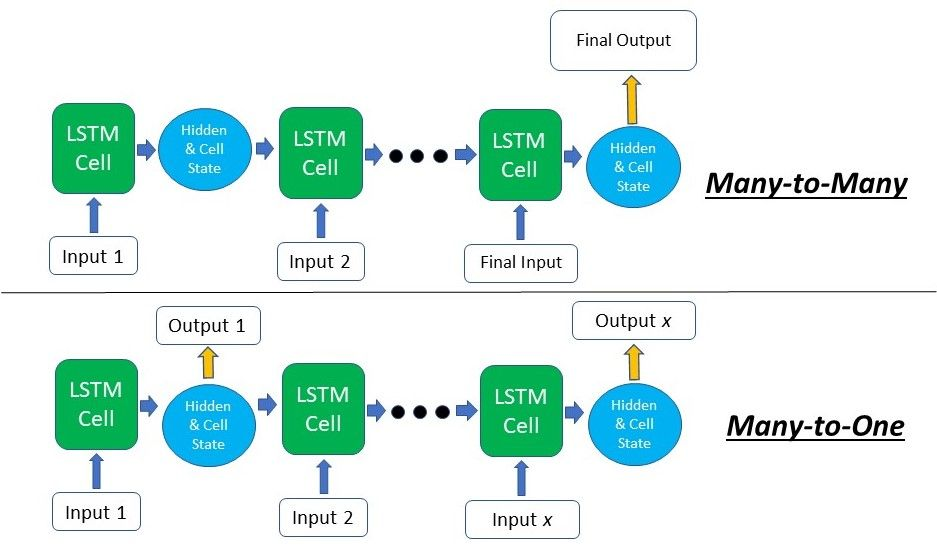

LSTM Cell Equations
======

Input Gate
------
$i_1 = \sigma(W_{i_1} \cdot (H_{t-1}, x_t) + bias_{i_1})$

$i_2 = tanh(W_{i_2} \cdot (H_{t-1}, x_t) + bias_{i_2})$

$i_{input} = i_1 * i_2$

Forget Gate
------
$f = \sigma(W_{forget} \cdot (H_{t-1}, x_t) + bias_{forget})$

$C_t = C_{t-1} * f + i_{input}$

Output Gate
------
$O_1 = \sigma (W_{output_1} \cdot (H_{t-1}, x_t) + bias_{output_1})$

$O_2 = tanh(W_{output_2} \cdot C_t + bias_{output_2})$

$H_t , O_t = O_1 * O_2$